In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [6]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [7]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [8]:
meal_info=pd.read_csv("meal_info.csv")
center_info=pd.read_csv("fulfilment_center_info.csv")

In [9]:
# Merge meal,center-info data with train and test data
trainfinal = pd.merge(train, meal_info, on="meal_id", how="left")
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="left")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [10]:
trainfinal=trainfinal.drop(['center_id','meal_id'],axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [11]:
cols=trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [12]:
trainfinal=trainfinal[cols]
trainfinal.dtypes

id                         int64
week                       int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
lb1=LabelEncoder()
trainfinal['center_type']=lb1.fit_transform(trainfinal['center_type'])
lb2=LabelEncoder()
trainfinal['category']=lb2.fit_transform(trainfinal['category'])
lb3=LabelEncoder()
trainfinal['cuisine']=lb3.fit_transform(trainfinal['cuisine'])

In [14]:
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,0,3,647,56,2,2.0
1,1466964,1,136.83,135.83,0,0,270,0,3,647,56,2,2.0
2,1346989,1,134.86,135.86,0,0,189,0,3,647,56,2,2.0
3,1338232,1,339.50,437.53,0,0,54,0,1,647,56,2,2.0
4,1448490,1,243.50,242.50,0,0,40,0,1,647,56,2,2.0


In [15]:
trainfinal.shape

(456548, 13)

In [16]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Num orders distribution')

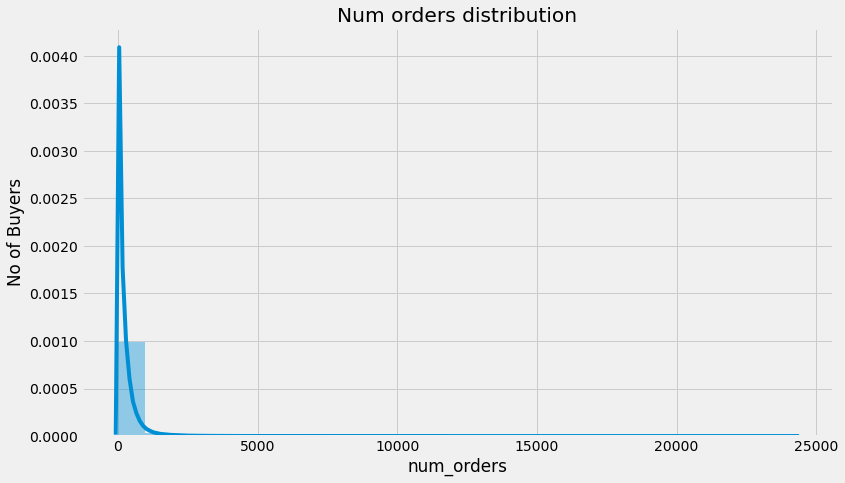

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(trainfinal.num_orders,bins=25)
plt.xlabel("num_orders")
plt.ylabel("No of Buyers")
plt.title("Num orders distribution")


In [18]:
trainfinal2=trainfinal.drop(['id'],axis=1)
correlation=trainfinal2.corr(method='pearson')
columns=correlation.nlargest(8,'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

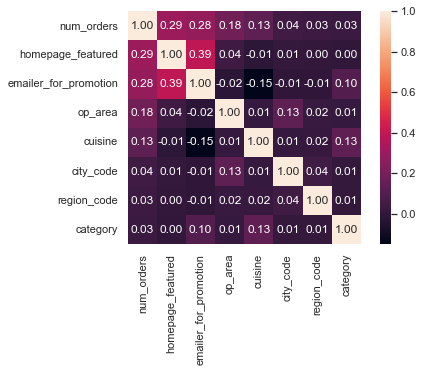

In [19]:
correlation_map=np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0)
heatmap=sns.heatmap(correlation_map,cbar=True,annot=True,square=True,fmt='.2f',yticklabels=columns.values,xticklabels=columns.values)
plt.show()


In [20]:
features=columns.drop(['num_orders'])
trainfinal3=trainfinal[features]
x=trainfinal3.values
y=trainfinal['num_orders'].values

In [21]:
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,1,647,56,0
4,0,0,2.0,1,647,56,0


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.25)

In [23]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [24]:
XG = XGBRegressor() 
XG.fit(x_train, y_train) 
y_pred = XG.predict(x_val) 
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 68.90274188013893


In [25]:
LR =LinearRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_val) 
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 128.7914798770464


In [26]:
L =Lasso()
L.fit(x_train, y_train)
y_pred = L.predict(x_val) 
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 128.49678313899645


In [27]:
EN =ElasticNet()
EN.fit(x_train, y_train)
y_pred = EN.predict(x_val) 
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 130.463215794827


In [28]:
DT =DecisionTreeRegressor()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_val) 
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 62.67459797176672


In [29]:
KNN =KNeighborsRegressor()
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_val) 
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 66.78590063827929


In [30]:
GB =GradientBoostingRegressor()
GB.fit(x_train, y_train)
y_pred = GB.predict(x_val) 
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 97.0640789411287


In [31]:
import pickle
pickle.dump(DT,open('fdemand.pkl','wb'))

In [32]:
testfinal = pd.merge(test, meal_info, on="meal_id", how="outer") 
testfinal = pd.merge(testfinal, center_info, on="center_id", how="outer")
testfinal = testfinal.drop(['meal_id', 'center_id'], axis=1)
tcols = testfinal.columns.tolist()
tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols]
lb1 = LabelEncoder()
testfinal['center_type'] = lb1.fit_transform(testfinal['center_type'])
lb2 = LabelEncoder()
testfinal['category'] = lb1.fit_transform(testfinal['category'])
lb3 = LabelEncoder()
testfinal['cuisine'] = lb1.fit_transform(testfinal['cuisine'])
x_test = testfinal[features].values

In [33]:
pred = DT.predict(x_test) 
pred[pred<0] = 0
submit = pd.DataFrame({
'id': testfinal['id'],
'num_orders' : pred
})

In [34]:
submit.to_csv("submission.csv",index=False)

In [35]:
submit.describe()

,id,num_orders
count,3.257300e+04,32573.000000
mean,1.248476e+06,262.244864
std,1.441580e+05,359.646557
min,1.000085e+06,15.431034
25%,1.123969e+06,64.685393
50%,1.247296e+06,148.316794
75%,1.372971e+06,321.142857
max,1.499996e+06,5511.882353


In [1]:
!pip install ibm_watson_machine_learning

  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.11.0-py3-none-any.whl size=73660 sha256=e01b4602497aecf8220785bdcafacc0f0b748e0b4f38c19e6c4e2632e73aa344
  Stored in directory: c:\users\91949\appdata\local\pip\cache\wheels\d3\a5\34\52d2e378d3d0446989ebcd214af8bad55beecf905258852b9f
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.11.0-py3-none-any.whl size=536351 sha256=5060d096fb29d483942d46db98f2f669b1f3b94987a23f40da0c84ae4b067d74
  Stored in directory: c:\users\91949\appdata\local\pip\cache\wheels\ed\a7\cd\32a2cf8bae11ba6fc56451b7c46608cfd9176d1da8c6f73fa1
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_sdk_s3transfer-2.11.0-py3-none-any.whl size=89486 sha256=6be04fb9835b250dea1c66119ffb14384fd796f6ab80c889b000445935e6771b
  Stored in directory: c:\users\91949\appdata\local\pip\cache\wheels\4a\3f\7c\551692188f14bdb095e715dd7f1061fec13b3766d45f3c3296
Successfully built ibm-cos-sdk ibm-cos-sdk-core ibm-cos-sdk-s3transfer


In [ ]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey" : "gQKptWaYIQFpIY14P2Q3FR5mSyWlkwDtcC9ovkqllYdA"
}
client = APIClient(wml_credentials)

In [ ]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [ ]:
space_uid = guid_from_space_name(client,'models')
print("Space UID = " + space_uid)

In [ ]:
client.set.default_space(space_uid)

In [ ]:
client.software_specifications.list()

In [ ]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

In [ ]:
metadata = {
    client.repository.ModelMetaNames.NAME:"Food_Demand_Forecasting",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

model_details = client.repository.store_model(model=DT,meta_props=metadata)
                                             
model_id = client.repository.get_model_id(model_details)

In [ ]:
model_id